In [1]:
import random

import matplotlib.pyplot as plt
from matplotlib import rcParams
import networkx as nx
import numpy as np
import powerlaw
import seaborn as sns
from skimage.transform import resize
from tqdm.notebook import tqdm

In [2]:
SEED = 42

np.random.seed(SEED)
random.seed(SEED)

In [3]:
DARK_BLUE_COLOR = "#131B6A"
BLUE_COLOR = "#393BD1"
YELLOW_COLOR = "#FCCB2F"
LIGHT_COLOR = "#FBFBFB"
GREEN_COLOR = "#038C48"
RED_COLOR = "#C70000"

GRAY_COLOR = "#CCCCCC"

In [4]:
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Roboto"]
rcParams["font.size"] = 7
rcParams["figure.dpi"] = 300
rcParams["axes.labelsize"] = 15
rcParams["axes.labelweight"] = "bold"
# rcParams["xtick.color"] = GRAY_COLOR


# Изображение 3.11, Барабаши
![Figure-3-11-Newman](http://networksciencebook.com/images/ch-03/figure-3-11.jpg)

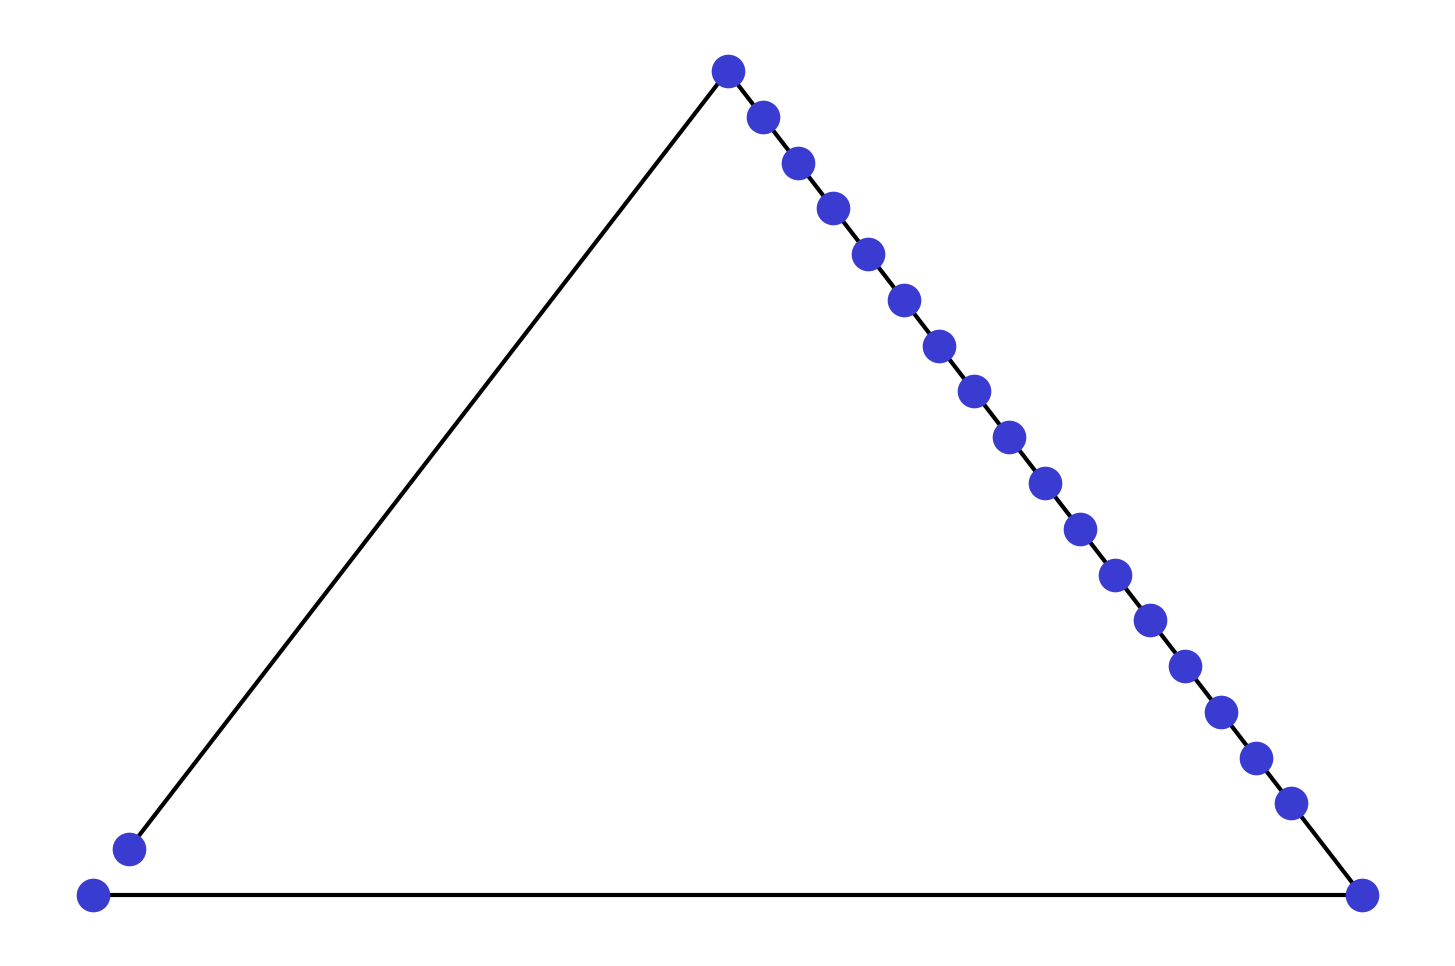

In [5]:
fig = plt.figure()
ax = fig.subplots()
G = nx.grid_graph(dim=(1, 20))
nx.draw_planar(G, node_size=50, ax=ax, node_color=BLUE_COLOR)
fig.savefig("images/1d_lattice.png")

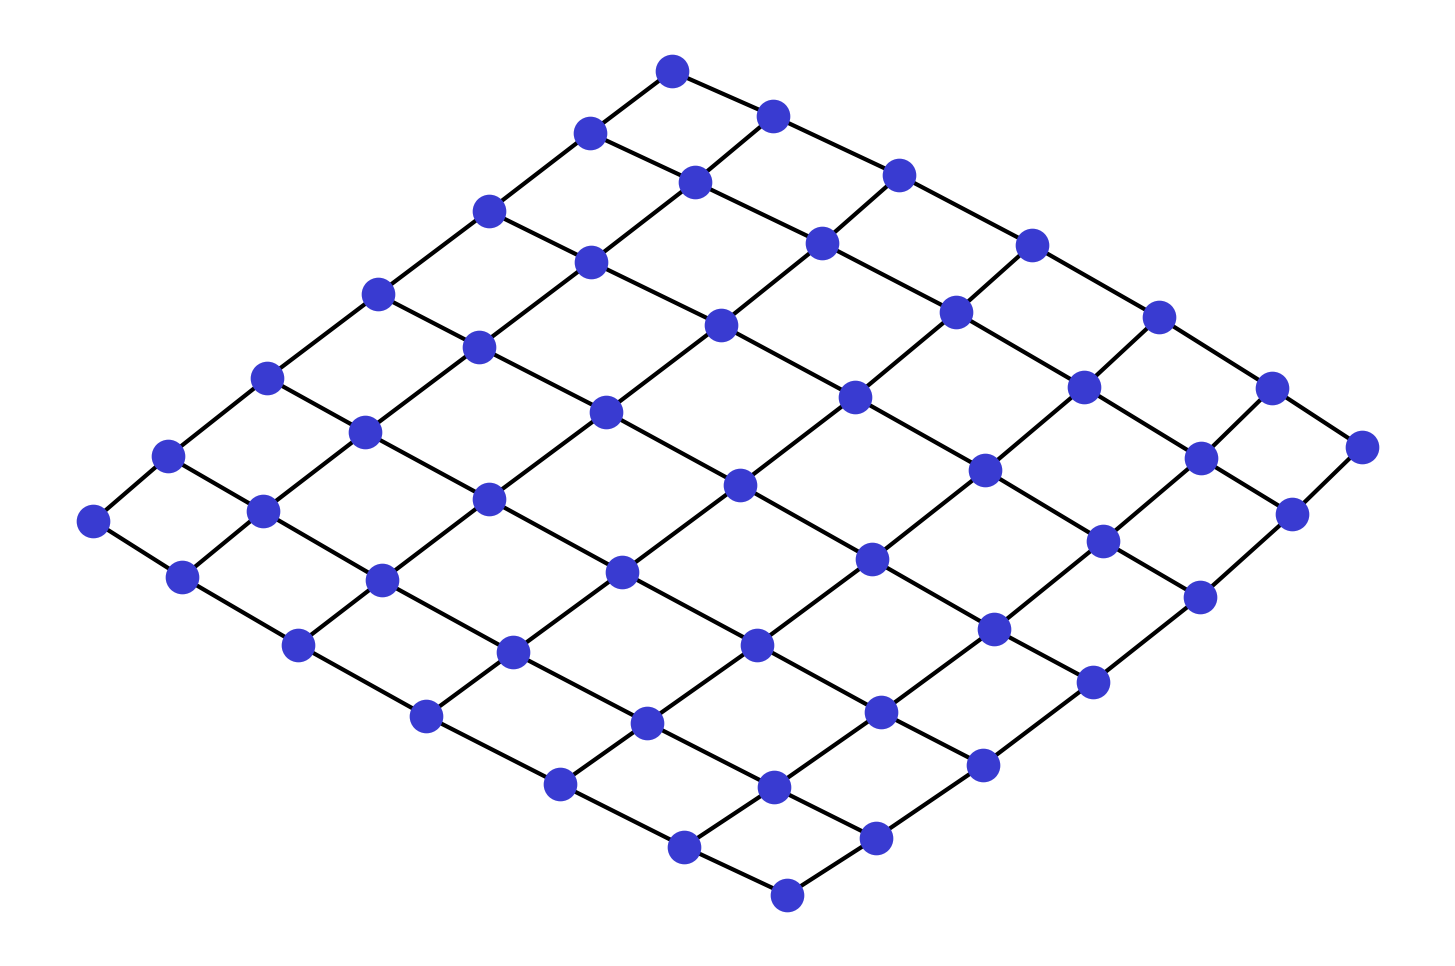

In [6]:
fig = plt.figure()
ax = fig.subplots()
G = nx.grid_graph(dim=(7, 7))
nx.draw(G, node_size=50, ax=ax, node_color=BLUE_COLOR)
fig.savefig("images/2d_lattice.png")

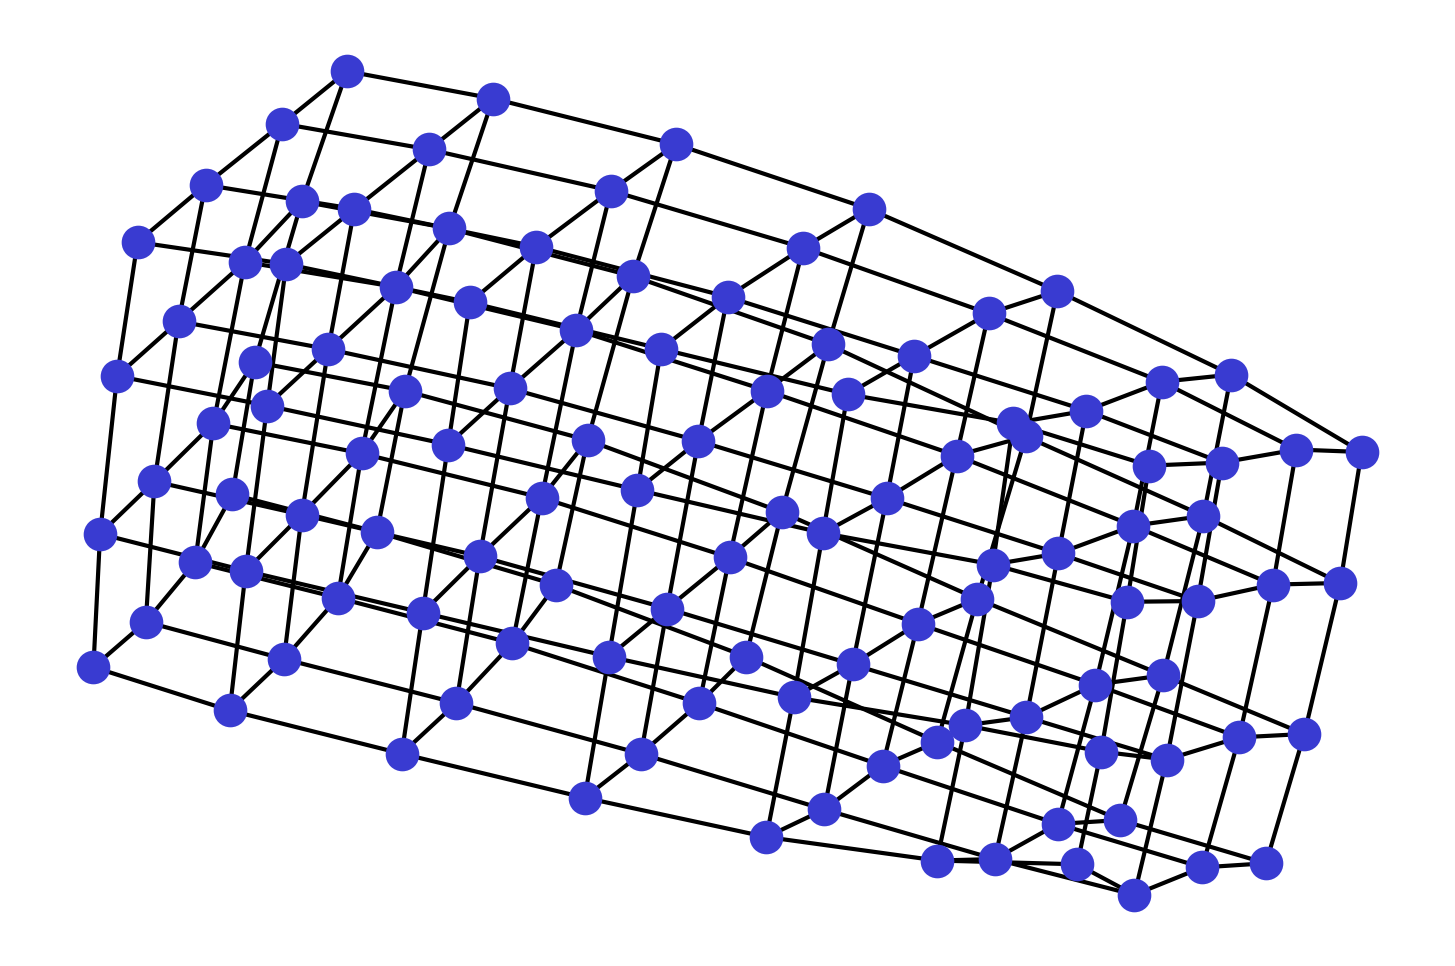

In [7]:
fig = plt.figure()
ax = fig.subplots()
G = nx.grid_graph(dim=(7, 4, 4))
nx.draw_spring(G, node_size=50, ax=ax, node_color=BLUE_COLOR)
fig.savefig("images/3d_lattice.png")

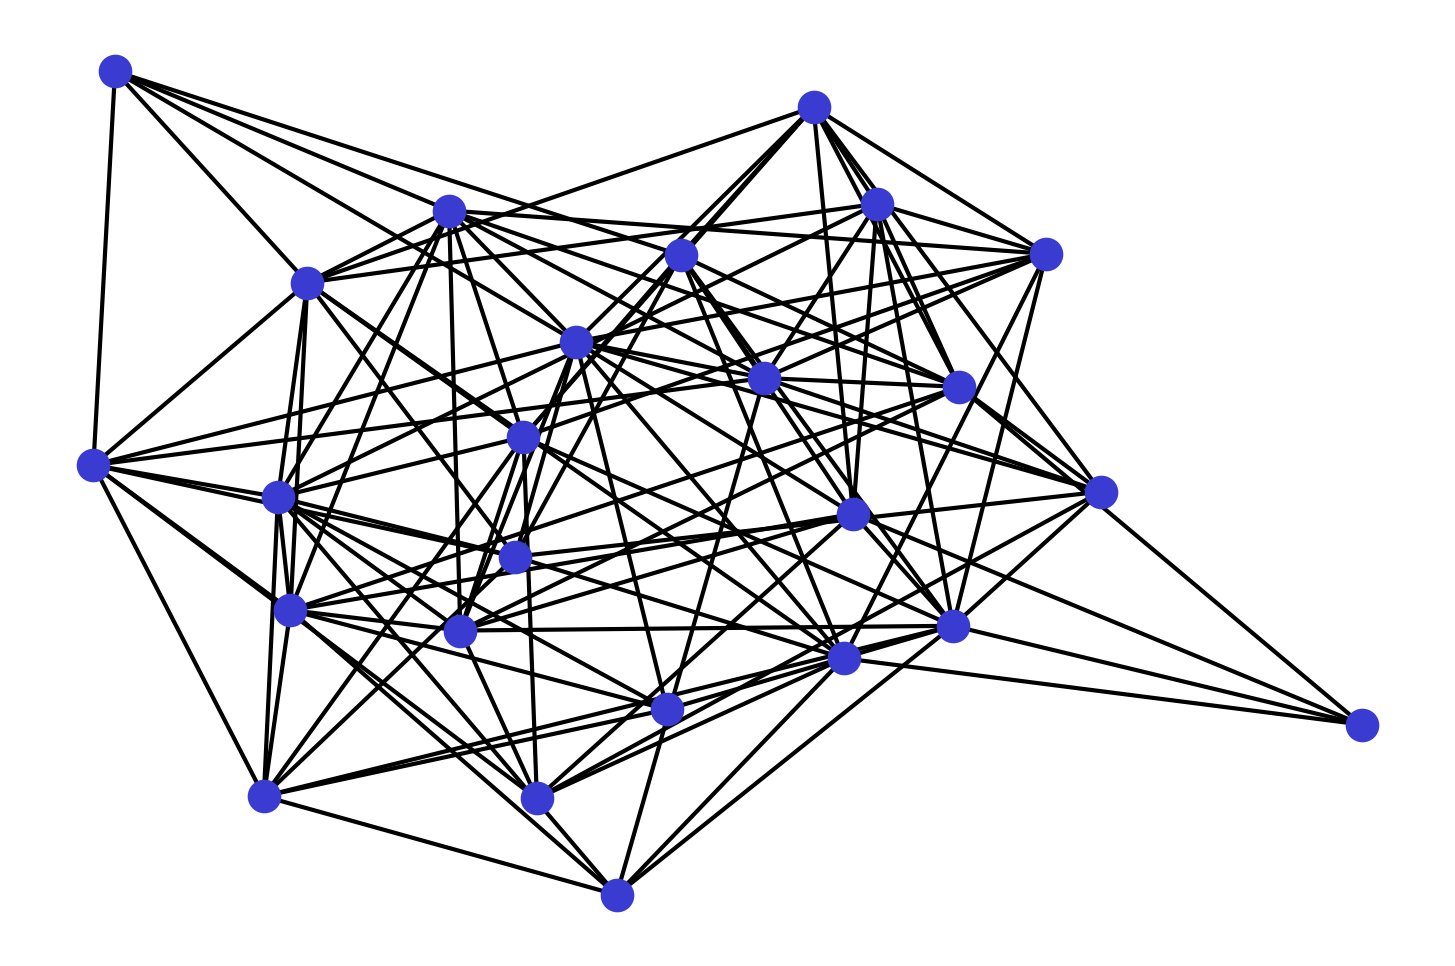

In [8]:
fig = plt.figure()
ax = fig.subplots()
G = nx.binomial_graph(25, .3)
nx.draw_spring(G, node_size=50, ax=ax, node_color=BLUE_COLOR)
fig.savefig("images/random_graph.png")

In [9]:
n = np.arange(0, 500)

one_d_lattice_avg_degree = n
two_d_lattice_avg_degree = np.sqrt(n)
three_d_lattice_avg_degree = np.power(n, 1/3)
random_graph_avg_degree = np.log1p(n) / 3

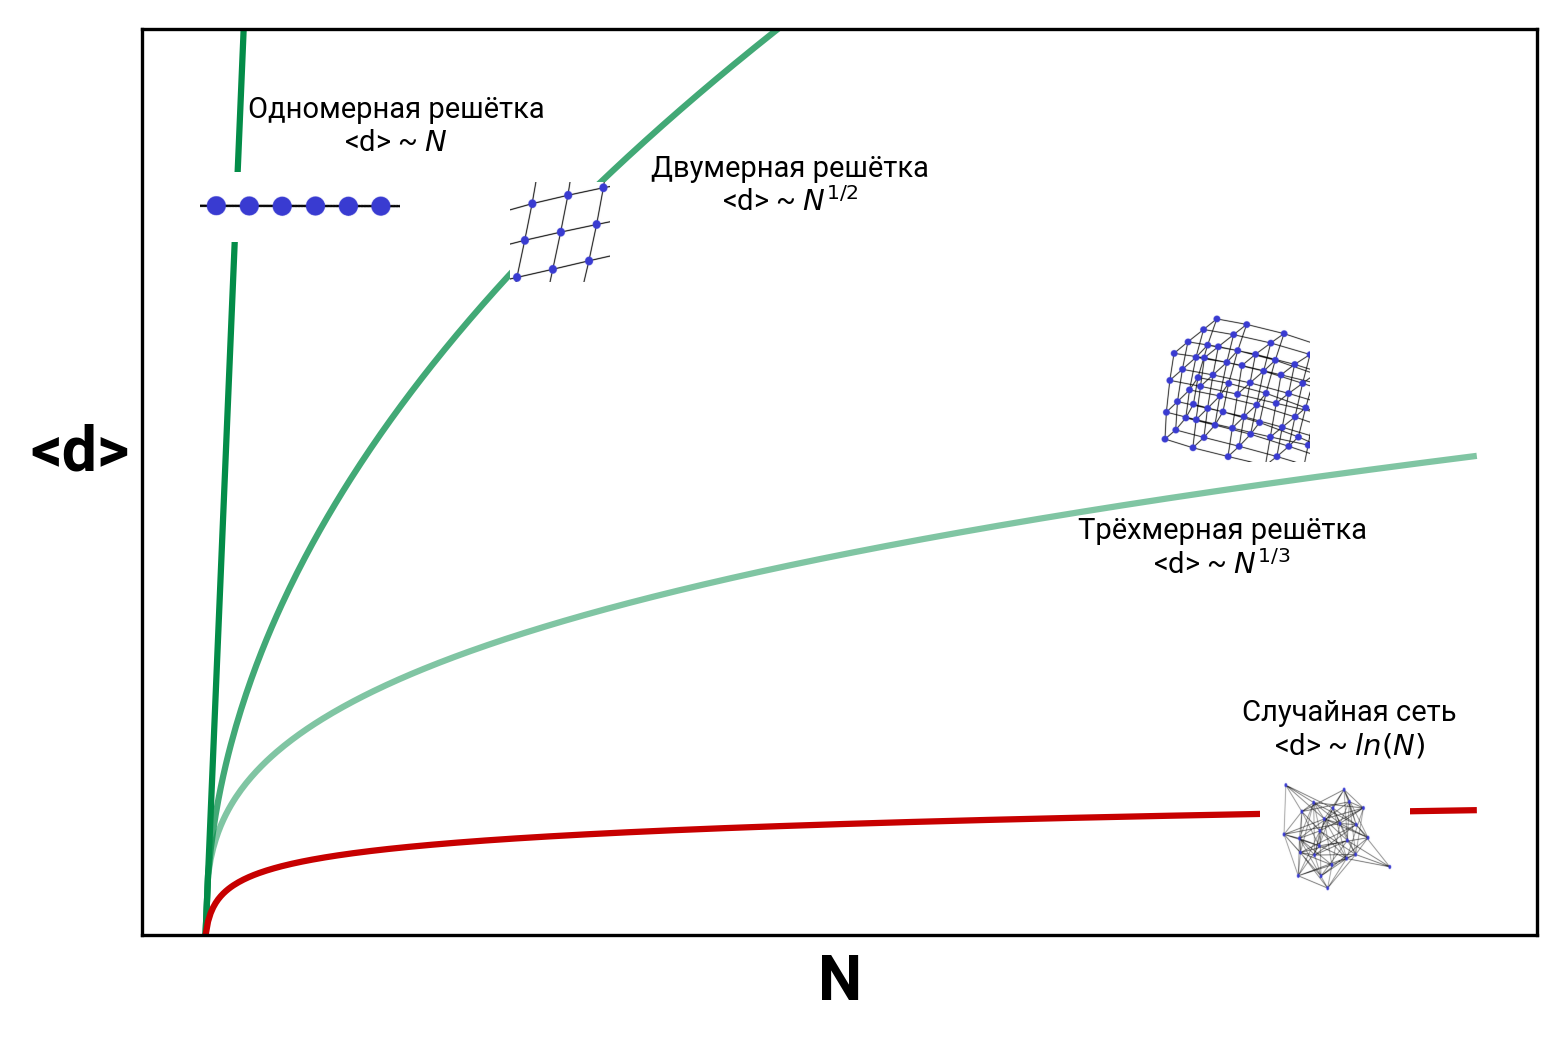

In [10]:
plt.plot(n, one_d_lattice_avg_degree, c=GREEN_COLOR, alpha=1, label="Одномерная решётка")
plt.plot(n, two_d_lattice_avg_degree, c=GREEN_COLOR, alpha=0.75, label="Двумерная решётка")
plt.plot(n, three_d_lattice_avg_degree, c=GREEN_COLOR, alpha=0.5, label="Трёхмерная решётка")
plt.plot(n, random_graph_avg_degree, c=RED_COLOR, label="Случайная сеть")

plt.ylim(0, 15)

plt.text(75, 13, "Одномерная решётка\n<d> ~ $N$", horizontalalignment="center")
plt.text(230, 12, "Двумерная решётка\n<d> ~ $N^{1/2}$", horizontalalignment="center")
plt.text(400, 6, "Трёхмерная решётка\n<d> ~ $N^{1/3}$", horizontalalignment="center")
plt.text(450, 3, "Случайная сеть\n<d> ~ $ln(N)$", horizontalalignment="center")

im_1d_lattice = plt.imread("images/1d_lattice_cut.png")
im_1d_lattice = resize(im_1d_lattice, (70, 200))
plt.figimage(im_1d_lattice, 200, 800)

im_2d_lattice = plt.imread("images/2d_lattice_cut.png")
im_2d_lattice = resize(im_2d_lattice, (100, 100))
plt.figimage(im_2d_lattice, 510, 760)

im_3d_lattice = plt.imread("images/3d_lattice_cut.png")
im_3d_lattice = resize(im_3d_lattice, (150, 150))
plt.figimage(im_3d_lattice, 1160, 580)

im_random_graph = plt.imread("images/random_graph.png")
im_random_graph = resize(im_random_graph, (150, 150))
plt.figimage(im_random_graph, 1260, 130)


# Remove ticks and labels
plt.xticks([], [])
plt.yticks([], [])

plt.xlabel("N", fontweight="bold")
plt.ylabel("<d>", rotation=0, fontweight="bold", labelpad=15)

plt.savefig("images/3_11.png")

# Изображение 3.12, Барабаши
![Figure 3-12](http://networksciencebook.com/images/ch-03/figure-3-12.jpg)

Source of the data: https://smg.media.mit.edu/library/milgram.smallworld.pdf

In [11]:
x = [0, 1, 2, 3,  4, 5,  6, 7, 8, 9, 10, 11]
y = [0, 2, 3, 8, 14, 8, 16, 6, 2, 2,  3,  0]

In [12]:
sum(y)  # Must be 64

64

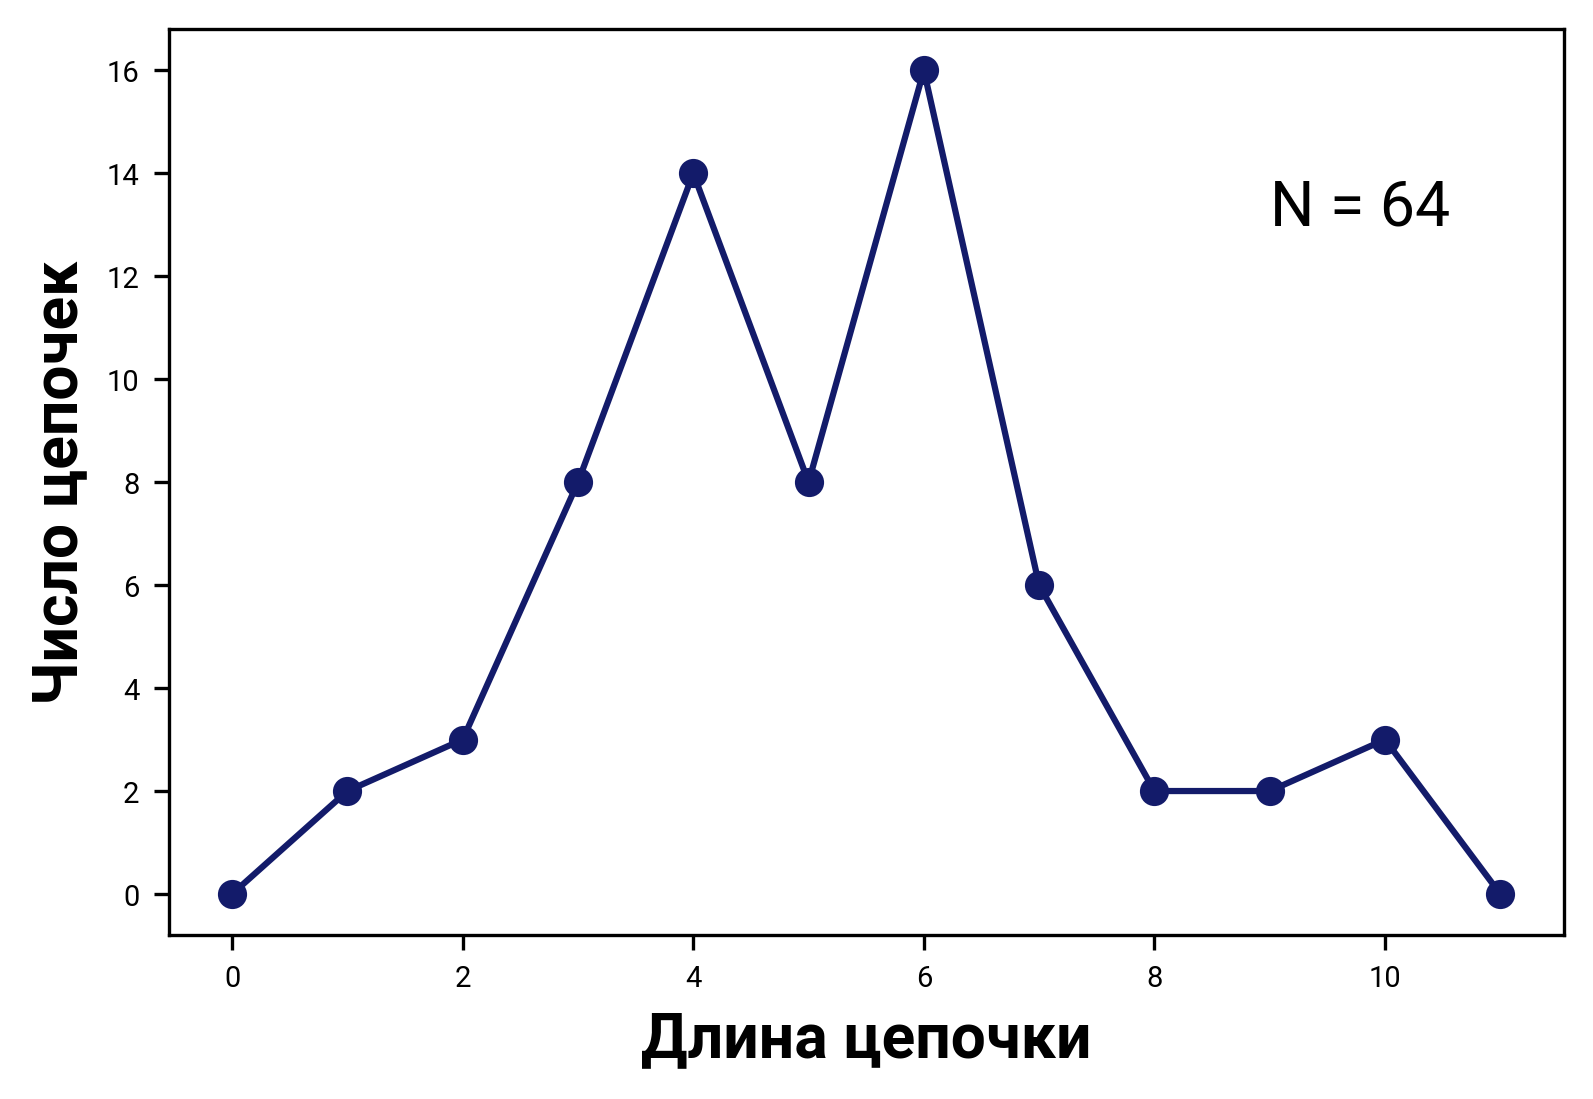

In [13]:
plt.plot(x, y, c=DARK_BLUE_COLOR, marker="o")
plt.xlabel("Длина цепочки")
plt.ylabel("Число цепочек")

plt.text(9, 13, "N = 64", fontsize=15)

plt.savefig("images/3_12.png")

In [14]:
ARRAY_SIZE = 2 * 10**5
N_ITERATIONS = 100

In [28]:
ALPHA_1 = 1.3
ALPHA_2 = 2.2
ALPHA_3 = 3.5
ALPHA_4 = 5.2

no_mean_generator = powerlaw.Power_Law(discrete=False, parameters=[ALPHA_1], xmin=1)
no_var_generator = powerlaw.Power_Law(discrete=False, parameters=[ALPHA_2], xmin=1)
mean_and_var_generator = powerlaw.Power_Law(discrete=False, parameters=[ALPHA_3], xmin=1)
big_alpha_generator = powerlaw.Power_Law(discrete=False, parameters=[ALPHA_4], xmin=1)

In [29]:
x = np.zeros(N_ITERATIONS)
powerlaw_no_mean_means = np.zeros(N_ITERATIONS)
powerlaw_no_var_means = np.zeros(N_ITERATIONS)
powerlaw_var_mean_means = np.zeros(N_ITERATIONS)
powerlaw_var_mean_big_alpha_means = np.zeros(N_ITERATIONS)

powerlaw_no_mean_vars = np.zeros(N_ITERATIONS)
powerlaw_no_var_vars = np.zeros(N_ITERATIONS)
powerlaw_var_mean_vars = np.zeros(N_ITERATIONS)
powerlaw_var_mean_big_alpha_vars = np.zeros(N_ITERATIONS)

DDOF = 1  # 1 makes the variance estimation unbiased

for i, n_observations in enumerate(tqdm(range(1, ARRAY_SIZE + 1, ARRAY_SIZE // N_ITERATIONS))):
    x[i] = n_observations
    powerlaw_no_mean = no_mean_generator.generate_random(n_observations)
    powerlaw_no_var = no_var_generator.generate_random(n_observations)
    powerlaw_var_mean = mean_and_var_generator.generate_random(n_observations)
    powerlaw_var_mean_big_alpha = big_alpha_generator.generate_random(n_observations)

    powerlaw_no_mean_means[i] = np.mean(powerlaw_no_mean)
    powerlaw_no_var_means[i] = np.mean(powerlaw_no_var)
    powerlaw_var_mean_means[i] = np.mean(powerlaw_var_mean)
    powerlaw_var_mean_big_alpha_means[i] = np.mean(powerlaw_var_mean_big_alpha)
    
    powerlaw_no_mean_vars[i] = np.var(powerlaw_no_mean, ddof=DDOF)
    powerlaw_no_var_vars[i] = np.var(powerlaw_no_var, ddof=DDOF)
    powerlaw_var_mean_vars[i] = np.var(powerlaw_var_mean, ddof=DDOF)
    powerlaw_var_mean_big_alpha_vars[i] = np.var(powerlaw_var_mean_big_alpha, ddof=DDOF)

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [31]:
def power_law_mean(alpha: float):
    return (alpha - 1) / (alpha - 2)

def power_law_variance(alpha: float):
    return (alpha - 1) / ((alpha - 3) * (alpha - 2)**2)

In [32]:
powerlaw_2_mean = power_law_mean(ALPHA_2)

powerlaw_3_mean = power_law_mean(ALPHA_3)
powerlaw_3_var = power_law_variance(ALPHA_3)

powerlaw_big_alpha_mean = power_law_mean(ALPHA_4)
powerlaw_big_alpha_var = power_law_variance(ALPHA_4)

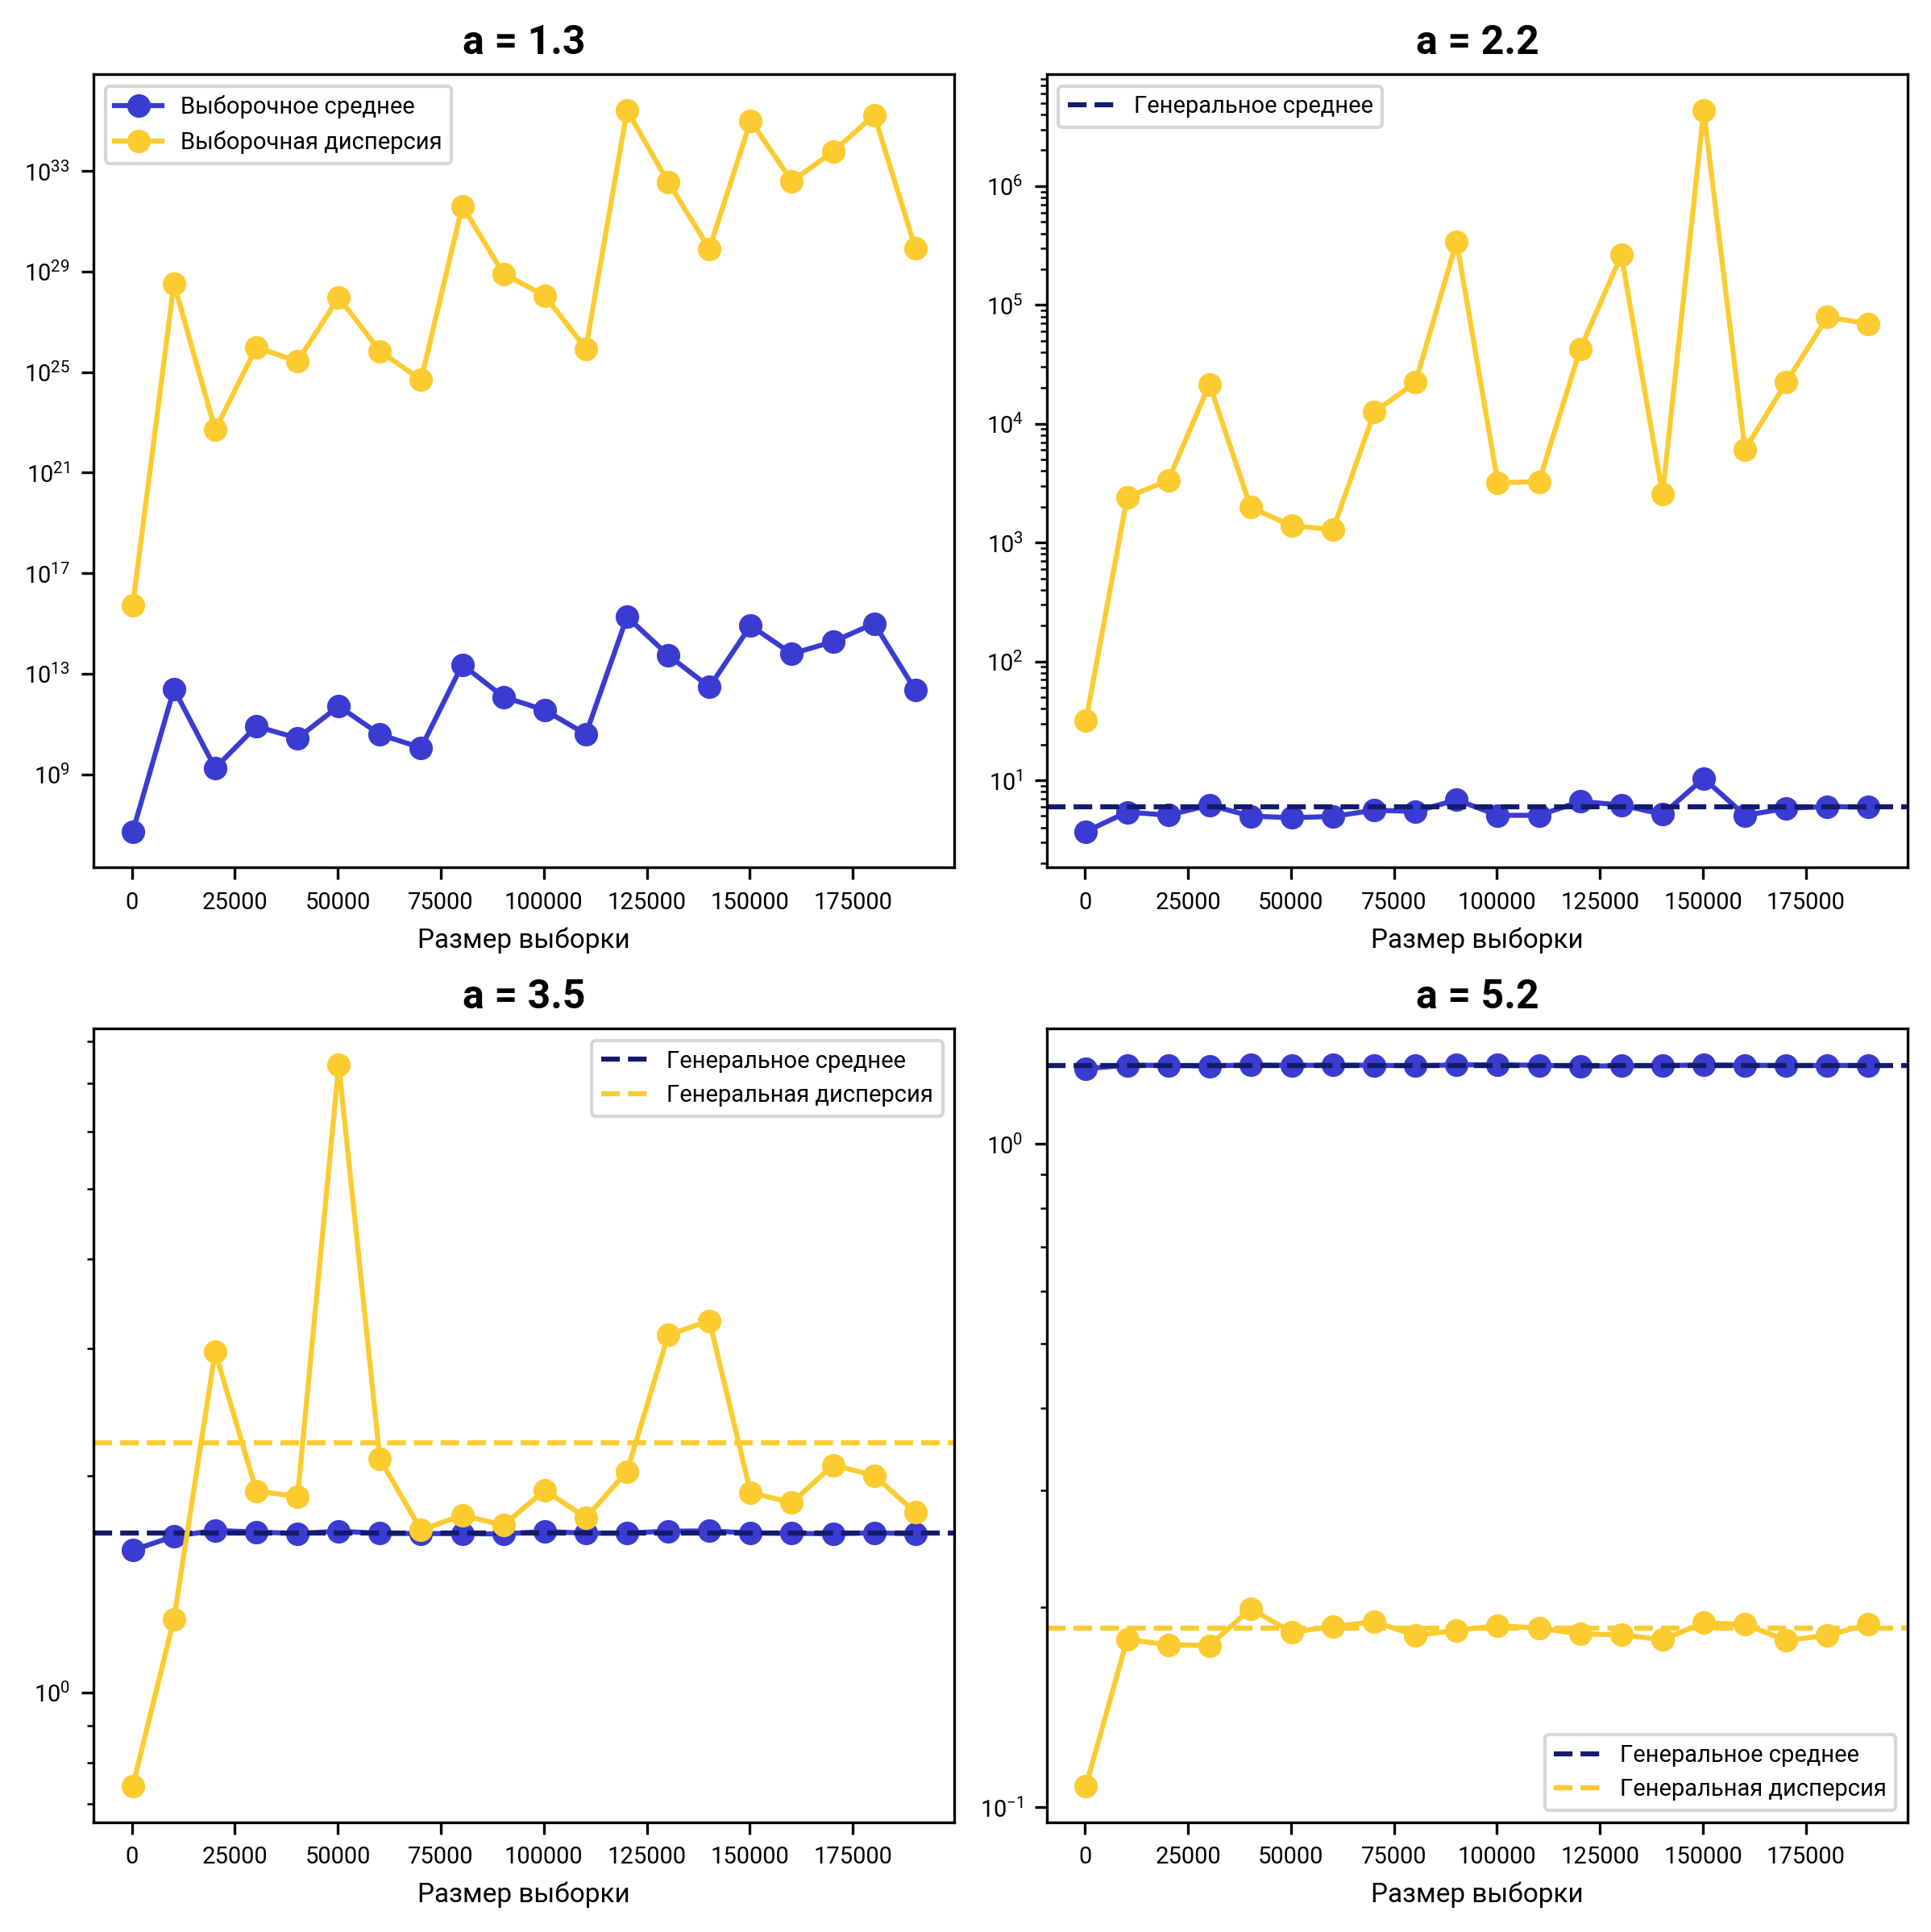

<Figure size 1800x1200 with 0 Axes>

In [46]:
STEP = N_ITERATIONS // 20  # The right number controls the number of points on the plot

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))

axes[0, 0].plot(x[1::STEP], powerlaw_no_mean_means[1::STEP], c=BLUE_COLOR, marker="o", label="Выборочное среднее")
axes[0, 0].plot(x[1::STEP], powerlaw_no_mean_vars[1::STEP], c=YELLOW_COLOR, marker="o", label="Выборочная дисперсия")
axes[0, 0].legend()
axes[0, 0].set_title(f"a = {ALPHA_1}", fontweight="bold", fontsize=12)

axes[0, 1].plot(x[1::STEP], powerlaw_no_var_means[1::STEP], c=BLUE_COLOR, marker="o")
axes[0, 1].axhline(powerlaw_2_mean, c=DARK_BLUE_COLOR, linestyle="--", label="Генеральное среднее")
axes[0, 1].plot(x[1::STEP], powerlaw_no_var_vars[1::STEP], c=YELLOW_COLOR, marker="o")
axes[0, 1].legend()
axes[0, 1].set_title(f"a = {ALPHA_2}", fontweight="bold", fontsize=12)

axes[1, 0].plot(x[1::STEP], powerlaw_var_mean_means[1::STEP], c=BLUE_COLOR, marker="o")
axes[1, 0].axhline(powerlaw_3_mean, c=DARK_BLUE_COLOR, linestyle="--", label="Генеральное среднее")
axes[1, 0].plot(x[1::STEP], powerlaw_var_mean_vars[1::STEP], c=YELLOW_COLOR, marker="o")
axes[1, 0].axhline(powerlaw_3_var, c=YELLOW_COLOR, linestyle="--", label="Генеральная дисперсия")
axes[1, 0].legend()
axes[1, 0].set_title(f"a = {ALPHA_3}", fontweight="bold", fontsize=12)

axes[1, 1].plot(x[1::STEP], powerlaw_var_mean_big_alpha_means[1::STEP], c=BLUE_COLOR, marker="o")
axes[1, 1].axhline(powerlaw_big_alpha_mean, c=DARK_BLUE_COLOR, linestyle="--", label="Генеральное среднее")
axes[1, 1].plot(x[1::STEP], powerlaw_var_mean_big_alpha_vars[1::STEP], c=YELLOW_COLOR, marker="o")
axes[1, 1].axhline(powerlaw_big_alpha_var, c=YELLOW_COLOR, linestyle="--", label="Генеральная дисперсия")
axes[1, 1].legend()
axes[1, 1].set_title(f"a = {ALPHA_4}", fontweight="bold", fontsize=12)

for i in range(2):
    for j in range(2):
        axes[i, j].set_yscale("log")
        axes[i, j].set_xlabel("Размер выборки", fontsize=8, fontweight="normal")

plt.tight_layout()
plt.show()
plt.savefig("images/powerlaw_parameters.png")

In [19]:
powerlaw_3_var

2.2222222222222223

In [20]:
np.mean(powerlaw_var_mean_vars[-10:])

1.8803296510619347

In [21]:
powerlaw_3_mean

1.6666666666666667

In [22]:
powerlaw_var_mean_means[-1]

1.6658481413155848

In [23]:
SAMPLE_SIZE = 10**5
N_ITERATIONS = 1000

powerlaw_3_5_means = np.zeros(N_ITERATIONS)
powerlaw_3_5_vars = np.zeros(N_ITERATIONS)

for i in tqdm(range(N_ITERATIONS)):
    sample = mean_and_var_generator.generate_random(SAMPLE_SIZE)
    powerlaw_3_5_means[i] = np.mean(sample)
    powerlaw_3_5_vars[i] = np.var(sample, ddof=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

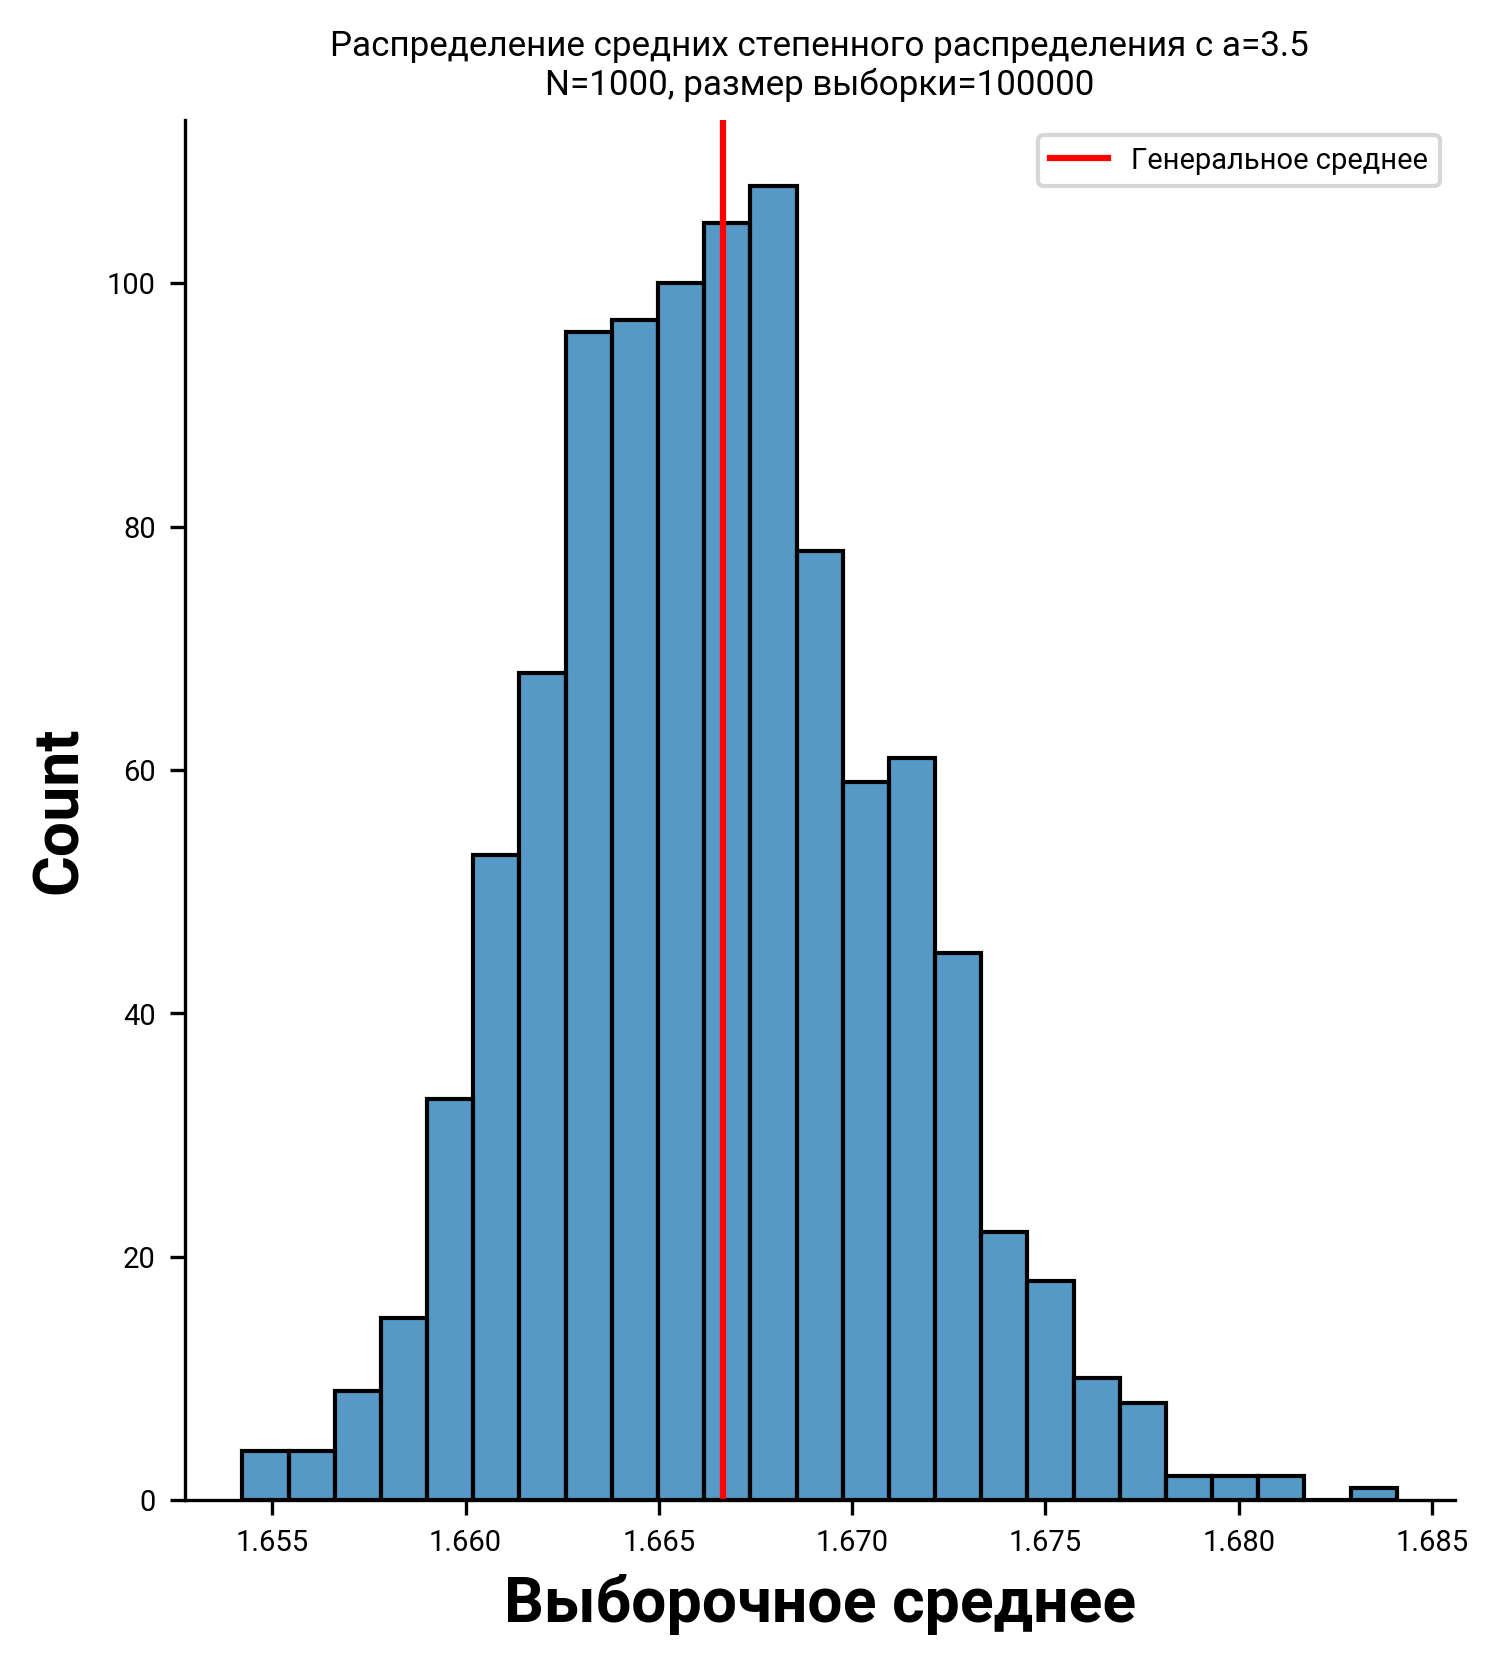

In [24]:
sns.displot(powerlaw_3_5_means)
plt.xlabel("Выборочное среднее")
plt.axvline(powerlaw_3_mean, c="red", label="Генеральное среднее")
plt.title(f"Распределение средних степенного распределения с a=3.5\nN={N_ITERATIONS}, размер выборки={SAMPLE_SIZE}")
plt.legend();

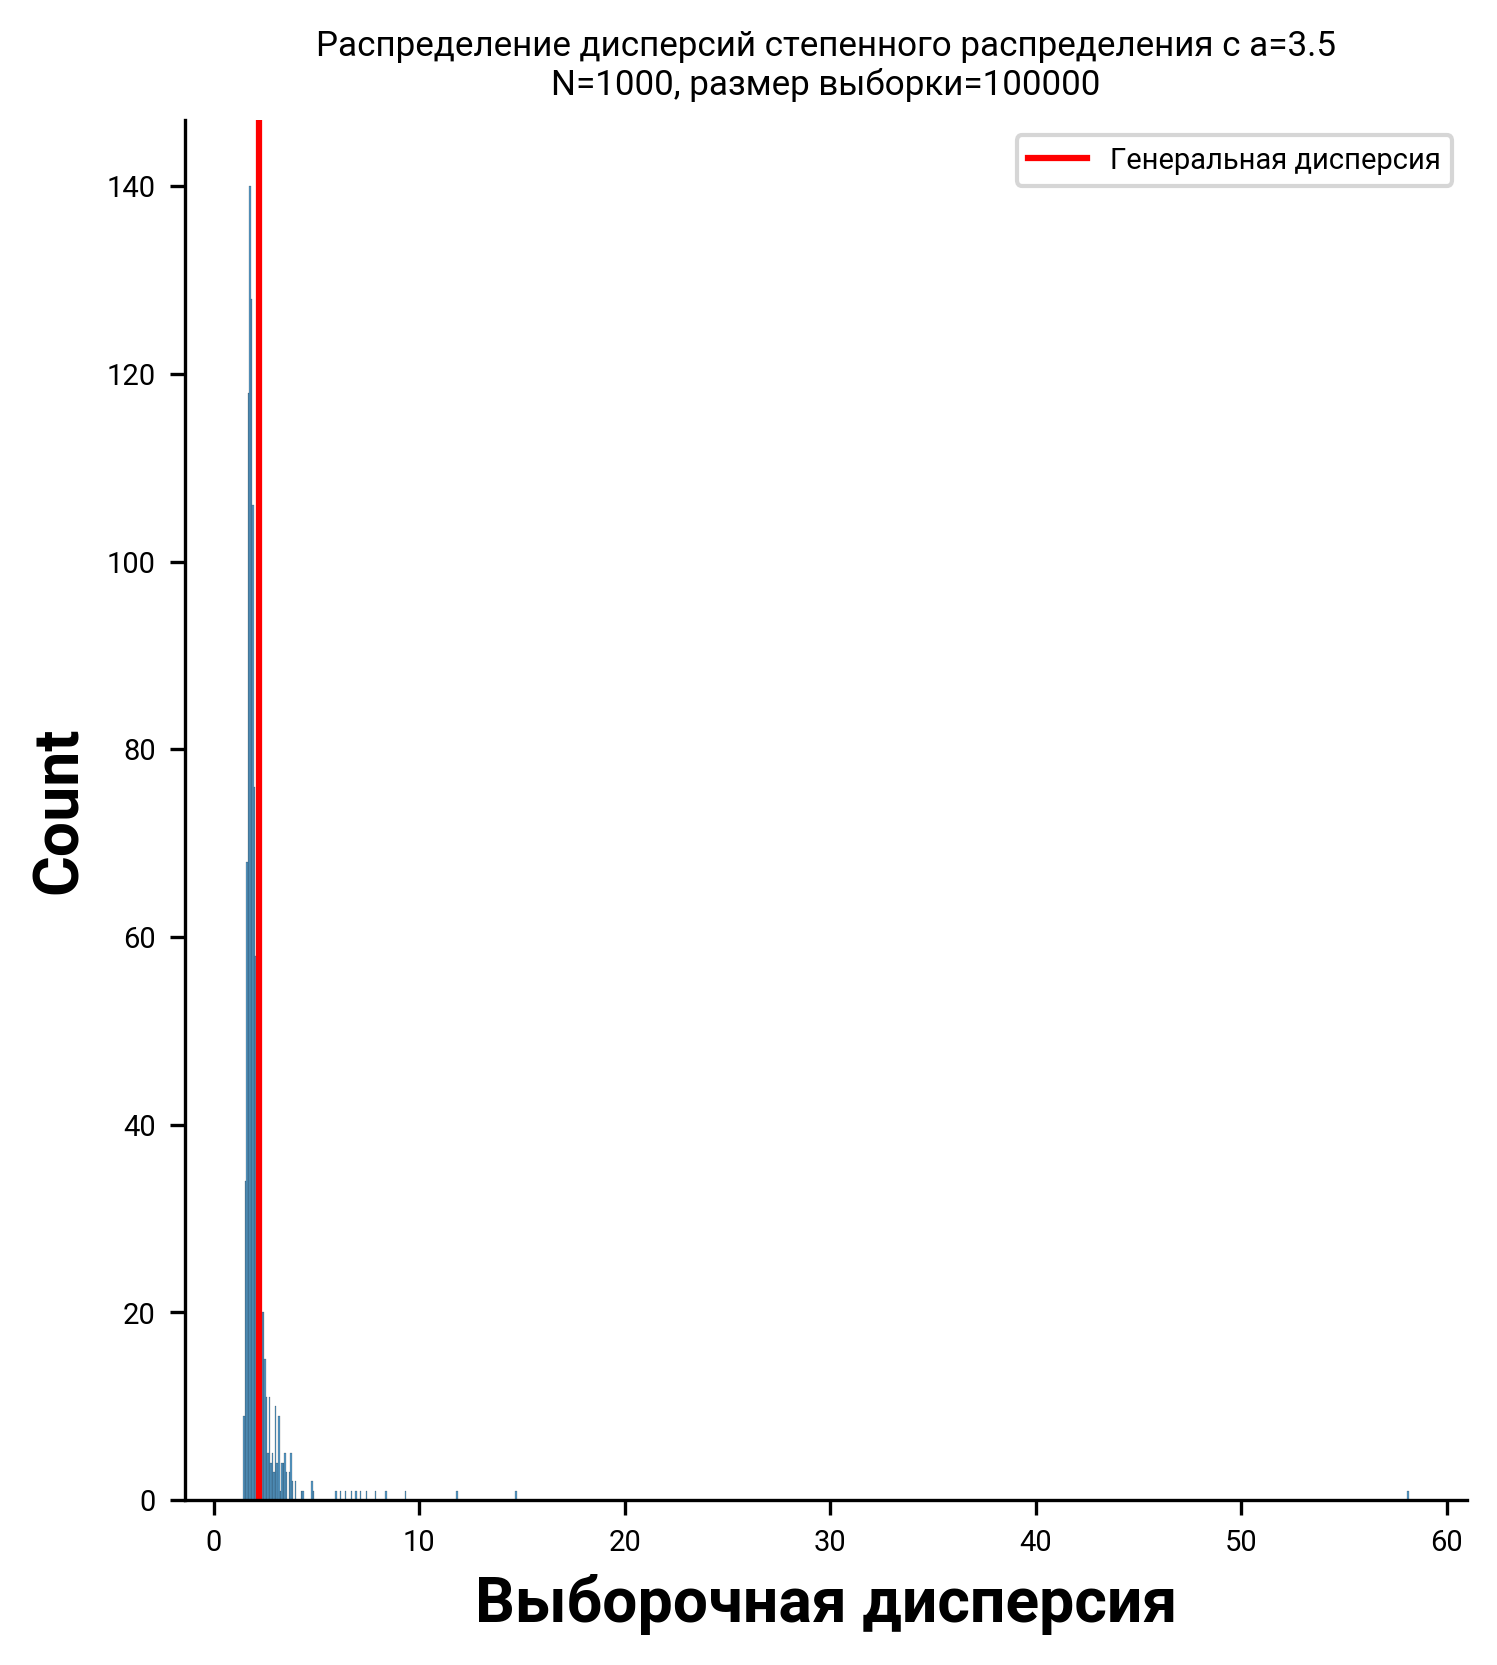

In [25]:
sns.displot(powerlaw_3_5_vars)
plt.xlabel("Выборочная дисперсия")
plt.axvline(powerlaw_3_var, c="red", label="Генеральная дисперсия")
plt.title(f"Распределение дисперсий степенного распределения с a=3.5\nN={N_ITERATIONS}, размер выборки={SAMPLE_SIZE}")
plt.legend();

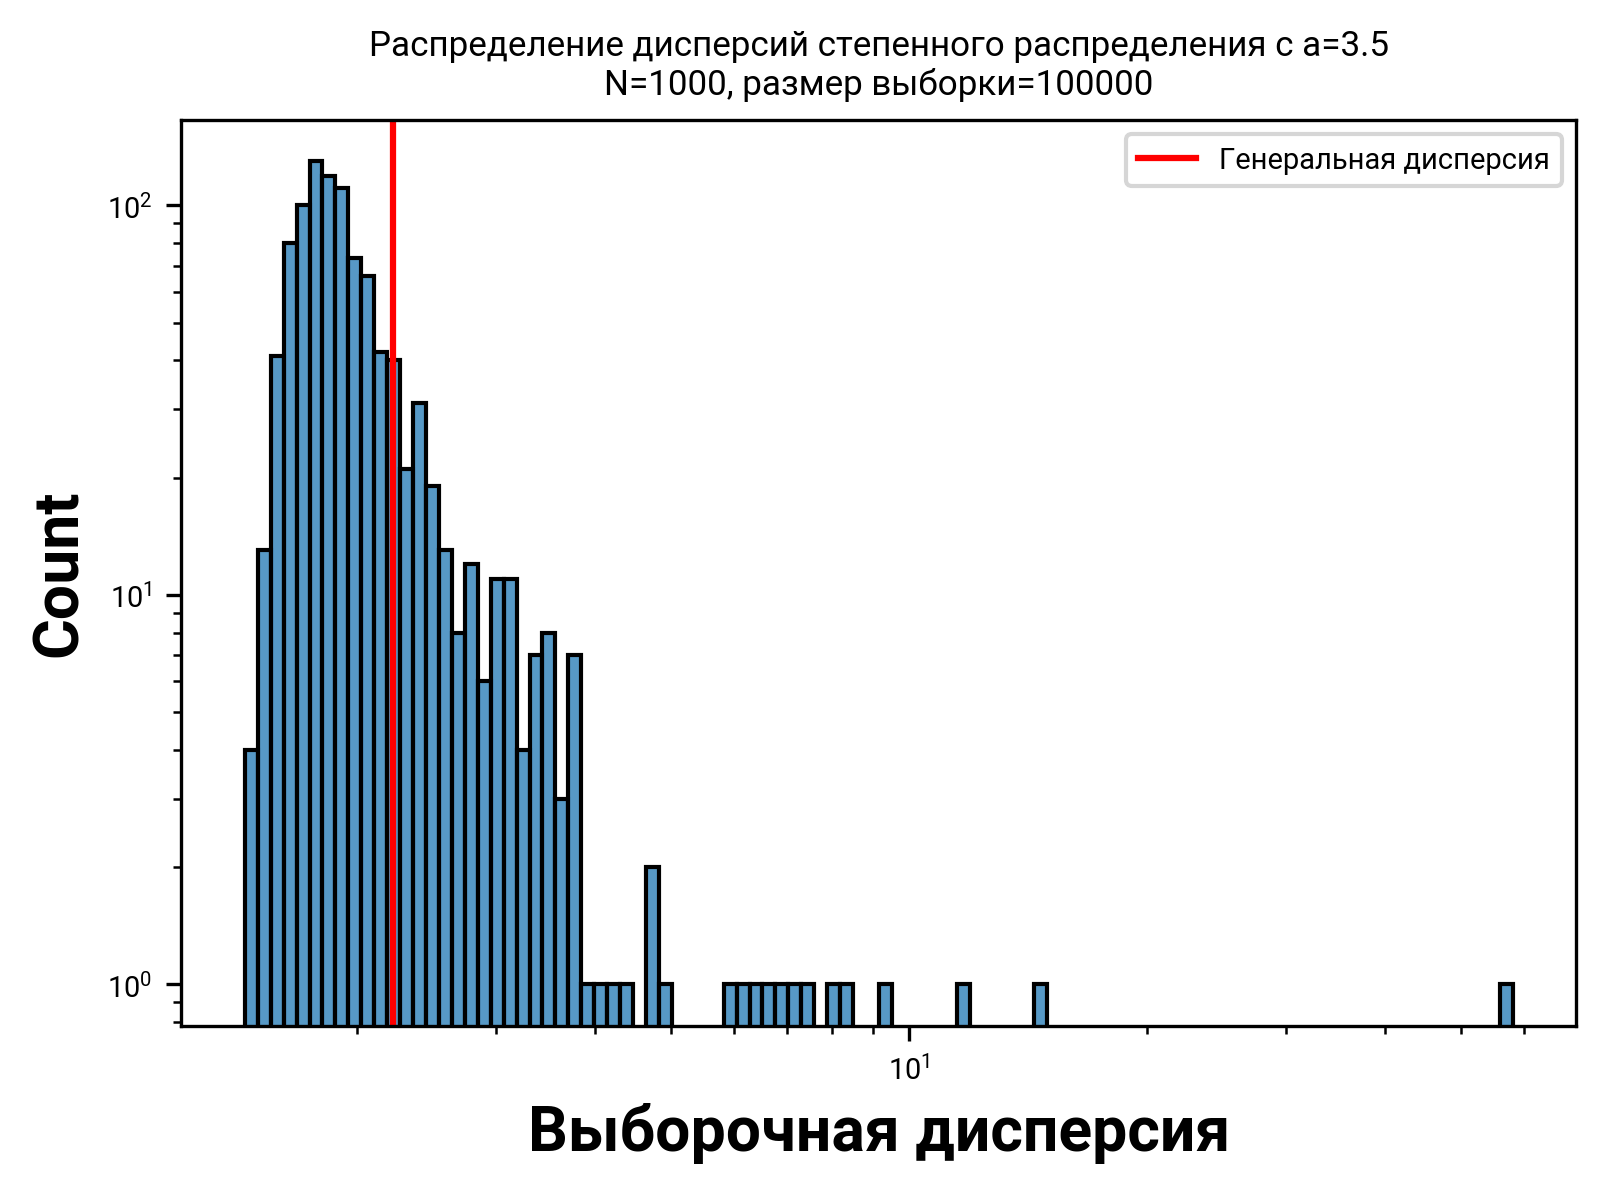

In [26]:
sns.histplot(powerlaw_3_5_vars, log_scale=True)
plt.xlabel("Выборочная дисперсия")
plt.axvline(powerlaw_3_var, c="red", label="Генеральная дисперсия")
plt.title(f"Распределение дисперсий степенного распределения с a=3.5\nN={N_ITERATIONS}, размер выборки={SAMPLE_SIZE}")
plt.yscale("log")
plt.legend();

In [53]:
powerlaw_var_mean

array([1.34400909, 1.49778277, 1.3504067 , ..., 1.58105525, 1.89042003,
       1.01268461])

In [57]:
x = []
calculated_vars = []
sample_vars = []


for n_observations in tqdm(range(1, 10**5, 1000)):
    x.append(n_observations)
    sample = mean_and_var_generator.generate_random(n_observations)
    sample_var = np.var(sample, ddof=1)
    sample_vars.append(sample_var)
    
    fitted_alpha = powerlaw.Fit(sample, xmin=1).alpha
    calculated_vars.append(power_law_variance(fitted_alpha))    

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\vladi\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Not enough data. Returning nan


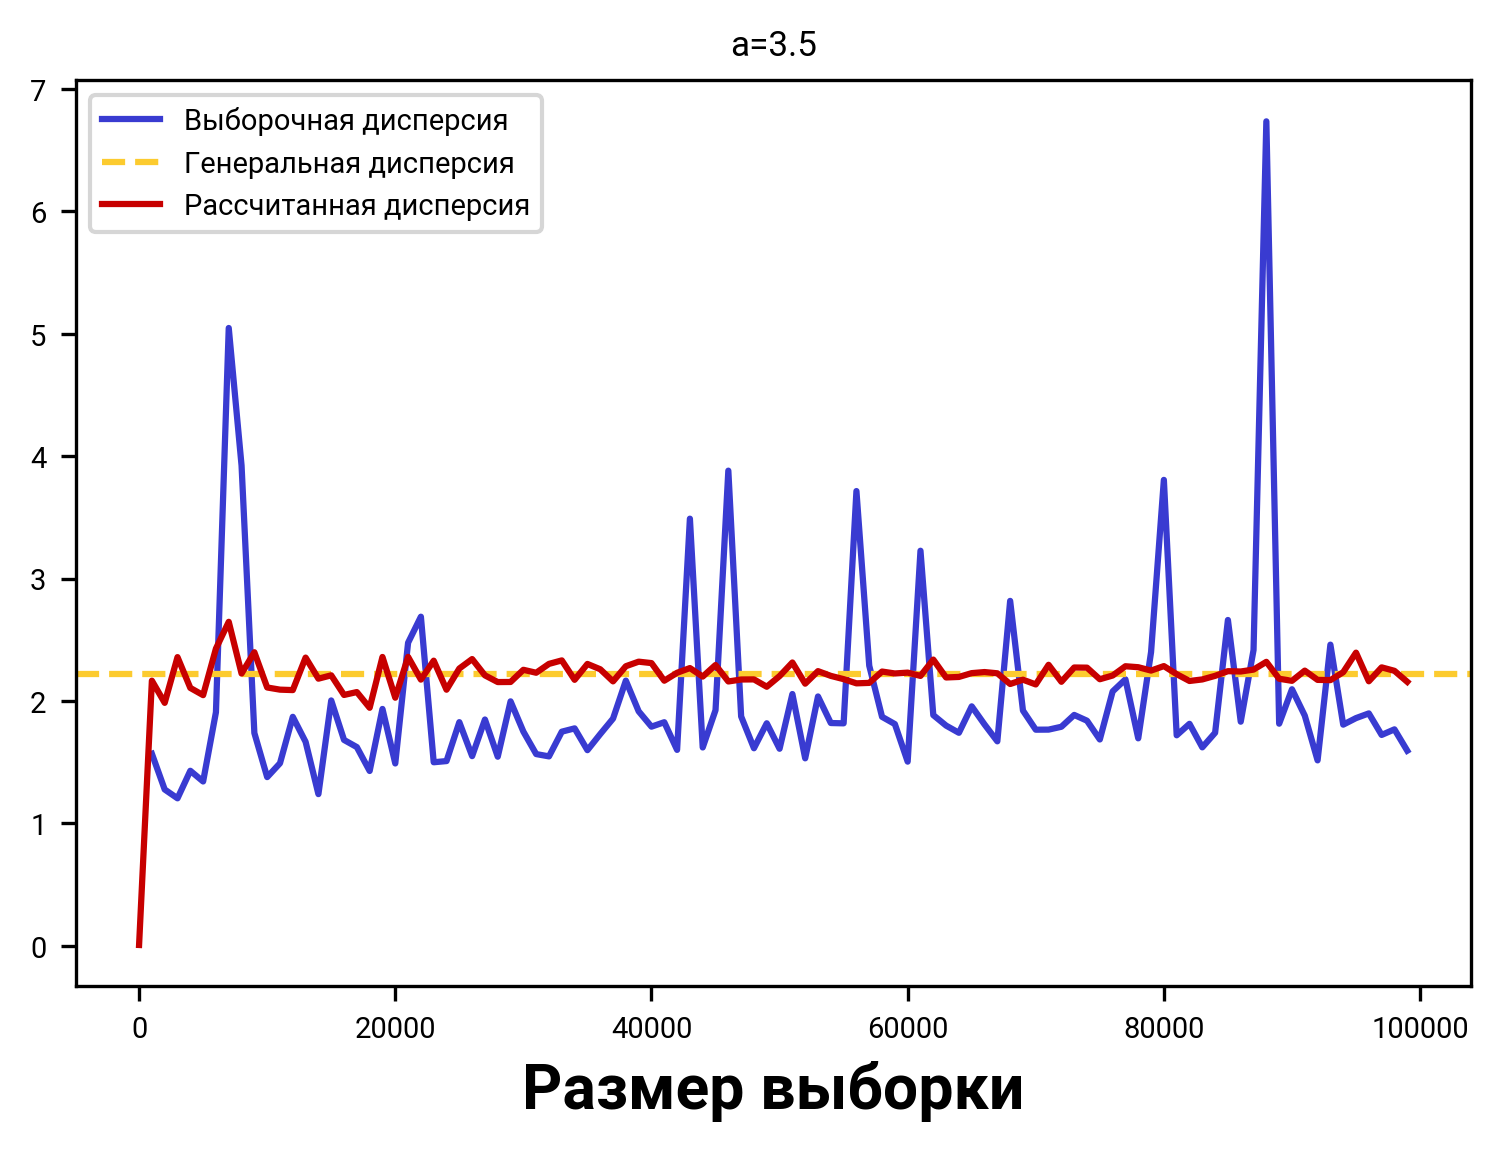

In [70]:
plt.plot(x, sample_vars, label="Выборочная дисперсия", c=BLUE_COLOR)
plt.axhline(powerlaw_3_var, label="Генеральная дисперсия", linestyle="--", c=YELLOW_COLOR)
plt.plot(x, calculated_vars, label="Рассчитанная дисперсия", c=RED_COLOR)
plt.xlabel("Размер выборки")
plt.title(f"a={ALPHA_3}")
plt.legend();